# Advanced E-commerce Classification (non-numerical)

In [1]:
!python --version  #make sure python version should be 3.10

Python 3.10.18


In [2]:
#!pip install numpy pandas matplotlib seaborn scikit_learn

In [3]:
#!pip install xgboost imblearn openpyxl

## STEP 1: DATA LOADING

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')

In [5]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

In [6]:
data = pd.read_excel("output.xlsx")

In [7]:
data.head()

,Unnamed: 0,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:51",69% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",66% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",68% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:53",69% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:53",68% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [8]:
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (30000, 18)


## STEP 2: DATA PREPROCESSING

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30000 non-null  int64  
 1   _id              30000 non-null  object 
 2   actual_price     29137 non-null  object 
 3   average_rating   27554 non-null  float64
 4   brand            27932 non-null  object 
 5   category         30000 non-null  object 
 6   crawled_at       30000 non-null  object 
 7   description      29059 non-null  object 
 8   discount         18017 non-null  object 
 9   images           30000 non-null  object 
 10  out_of_stock     30000 non-null  bool   
 11  pid              30000 non-null  object 
 12  product_details  30000 non-null  object 
 13  seller           28259 non-null  object 
 14  selling_price    29998 non-null  object 
 15  sub_category     30000 non-null  object 
 16  title            30000 non-null  object 
 17  url         

In [10]:
data.describe()

,Unnamed: 0,average_rating
count,30000.000000,27554.000000
mean,14999.500000,3.641972
std,8660.398374,0.664232
min,0.000000,1.000000
25%,7499.750000,3.300000
50%,14999.500000,3.800000
75%,22499.250000,4.100000
max,29999.000000,5.000000


In [11]:
data_processed = data.copy()

### Handle missing values (if any)

In [12]:
print(f"Missing Values:\n{data_processed.isnull().sum()}")

Missing Values:
Unnamed: 0             0
_id                    0
actual_price         863
average_rating      2446
brand               2068
category               0
crawled_at             0
description          941
discount           11983
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1741
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64


In [13]:
print(f"Data Types:\n{data_processed.dtypes}")

Data Types:
Unnamed: 0           int64
_id                 object
actual_price        object
average_rating     float64
brand               object
category            object
crawled_at          object
description         object
discount            object
images              object
out_of_stock          bool
pid                 object
product_details     object
seller              object
selling_price       object
sub_category        object
title               object
url                 object
dtype: object


In [14]:
# Fill numeric columns with median
for col in data_processed.select_dtypes(include=['number']).columns:
    data_processed[col] = data_processed[col].fillna(data_processed[col].median())

# Fill categorical columns with mode (most frequent value)
for col in data_processed.select_dtypes(include=['object', 'category', 'bool']).columns:
    if data_processed[col].isnull().any():
        data_processed[col] = data_processed[col].fillna(data_processed[col].mode()[0])

In [15]:
print(f"Filled Missing Values:\n{data_processed.isnull().sum()}")

Filled Missing Values:
Unnamed: 0         0
_id                0
actual_price       0
average_rating     0
brand              0
category           0
crawled_at         0
description        0
discount           0
images             0
out_of_stock       0
pid                0
product_details    0
seller             0
selling_price      0
sub_category       0
title              0
url                0
dtype: int64


In [16]:
# Convert price columns to numeric
price_columns = ['actual_price', 'selling_price']
for col in price_columns:
    if col in data_processed.columns:
        data_processed[col] = pd.to_numeric(data_processed[col], errors='coerce')
        data_processed[col].fillna(data_processed[col].median(), inplace=True)

In [17]:
# Convert discount to numeric
if 'discount' in data_processed.columns:
    data_processed['discount'] = pd.to_numeric(data_processed['discount'], errors='coerce')
    data_processed['discount'].fillna(0, inplace=True)

In [18]:
# Encode categorical variables
print("\nEncoding categorical variables...")
label_encoders = {}
categorical_features = ['brand', 'category', 'seller', 'sub_category']

for col in categorical_features:
    if col in data_processed.columns:
        le = LabelEncoder()
        data_processed[f'{col}_encoded'] = le.fit_transform(data_processed[col].astype(str))
        label_encoders[col] = le
        print(f"{col}: {len(le.classes_)} unique values")


Encoding categorical variables...
brand: 324 unique values
category: 4 unique values
seller: 534 unique values
sub_category: 24 unique values


In [19]:
# Drop original categorical columns
data_processed = data_processed.drop(columns=categorical_features, errors='ignore')

In [20]:
# Convert target to binary (True/False to 1/0)
data_processed['out_of_stock'] = data_processed['out_of_stock'].astype(int)

print(f"\nAfter preprocessing: {data_processed.shape}")
print("Categorical encoding completed")
print("Missing values handled")
print("Data types converted")


After preprocessing: (30000, 18)
Categorical encoding completed
Missing values handled
Data types converted


In [21]:
data_processed.dtypes

Unnamed: 0                int64
_id                      object
actual_price            float64
average_rating          float64
crawled_at               object
description              object
discount                float64
images                   object
out_of_stock              int64
pid                      object
product_details          object
selling_price           float64
title                    object
url                      object
brand_encoded             int64
category_encoded          int64
seller_encoded            int64
sub_category_encoded      int64
dtype: object

In [22]:
data_processed.head(20)

,Unnamed: 0,_id,actual_price,average_rating,crawled_at,description,discount,images,out_of_stock,pid,product_details,selling_price,title,url,brand_encoded,category_encoded,seller_encoded,sub_category_encoded
0,0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,849.0,3.9,"02/10/2021, 20:11:51",69% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",921.0,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,284,1,415,1
1,1,893e6980-f2a0-531f-b056-34dd63fe912c,849.0,3.9,"02/10/2021, 20:11:52",66% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",499.0,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...,284,1,415,1
2,2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,849.0,3.9,"02/10/2021, 20:11:52",68% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",931.0,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,284,1,415,1
3,3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,849.0,3.9,"02/10/2021, 20:11:53",69% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",911.0,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,284,1,415,1
4,4,750caa3d-6264-53ca-8ce1-94118a1d8951,849.0,3.9,"02/10/2021, 20:11:53",68% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",943.0,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...,284,1,415,1
5,5,9af4ac75-230b-5d51-8bbf-2ffb19aaa763,849.0,3.8,"02/10/2021, 20:11:54",74% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFCZ9EFK9DNWDA,"[{'Style Code': '1005COMBO12'}, {'Closure': 'E...",499.0,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,284,1,415,1
6,6,1b1d40cc-4eaa-54cf-8938-e59ecae5f19e,849.0,3.8,"02/10/2021, 20:11:54",68% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFDABN3GXYPFHE,"[{'Style Code': '1005NAVI'}, {'Closure': 'Elas...",466.0,Solid Men Dark Blue Track Pants,https://www.flipkart.com/yorker-solid-men-dark...,284,1,415,1
7,7,a33cf2e2-c5e4-5f06-b3aa-8f46a6fd1aef,849.0,3.8,"02/10/2021, 20:11:55",63% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFCZ9ESGZYT8NH,"[{'Style Code': '1005DSKIN'}, {'Closure': 'Ela...",545.0,Solid Men Beige Track Pants,https://www.flipkart.com/yorker-solid-men-beig...,284,1,415,1
8,8,ab4f0cca-6a84-51e1-b7e8-523724db8728,849.0,3.8,"02/10/2021, 20:11:55",67% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFCZ9DYU33FFXS,"[{'Style Code': '1005BLACK'}, {'Closure': 'Dra...",489.0,Solid Men Black Track Pants,https://www.flipkart.com/yorker-solid-men-blac...,284,1,415,1
9,9,f8a91e89-c5db-5fa5-9428-1f580a72d05e,849.0,3.7,"02/10/2021, 20:11:56",64% off,0.0,['https://rukminim1.flixcart.com/image/128/128...,0,TKPFDABN4NQFVKZY,"[{'Style Code': '1005MLGREY'}, {'Closure': 'El...",531.0,Solid Men Grey Track Pants,https://www.flipkart.com/yorker-solid-men-grey...,284,1,415,1


## STEP 3: FEATURE ENGINEERING

In [23]:
# Price-based features
if 'actual_price' in data_processed.columns and 'selling_price' in data_processed.columns:
    data_processed['price_difference'] = data_processed['actual_price'] - data_processed['selling_price']
    data_processed['discount_amount'] = data_processed['price_difference']
    data_processed['price_ratio'] = data_processed['selling_price'] / (data_processed['actual_price'] + 1)
    print("Price-based features created")

Price-based features created


In [24]:
# Discount features
if 'discount' in data_processed.columns:
    data_processed['high_discount'] = (data_processed['discount'] > 50).astype(int)
    data_processed['medium_discount'] = ((data_processed['discount'] > 25) & (data_processed['discount'] <= 50)).astype(int)
    data_processed['low_discount'] = (data_processed['discount'] <= 25).astype(int)
    data_processed['discount_squared'] = data_processed['discount'] ** 2
    print("Discount features created")

Discount features created


In [25]:
# Rating features
if 'average_rating' in data_processed.columns:
    data_processed['rating_squared'] = data_processed['average_rating'] ** 2
    data_processed['high_rated'] = (data_processed['average_rating'] >= 4.0).astype(int)
    data_processed['low_rated'] = (data_processed['average_rating'] < 3.0).astype(int)
    data_processed['rating_category'] = pd.cut(data_processed['average_rating'], 
                                                bins=[0, 2, 3, 4, 5], 
                                                labels=[0, 1, 2, 3]).astype(int)
    print("Rating features created")

Rating features created


In [26]:
# Interaction features
if 'discount' in data_processed.columns and 'average_rating' in data_processed.columns:
    data_processed['discount_rating_interaction'] = data_processed['discount'] * data_processed['average_rating']
    data_processed['value_score'] = data_processed['average_rating'] / (data_processed['discount'] + 1)
    print("Interaction features created")

Interaction features created


In [27]:
# Brand/Category popularity (frequency encoding)
for col in ['brand_encoded', 'category_encoded', 'seller_encoded']:
    if col in data_processed.columns:
        freq = data_processed[col].value_counts().to_dict()
        data_processed[f'{col}_frequency'] = data_processed[col].map(freq)

print("Frequency encoding completed")

Frequency encoding completed


In [28]:
# Price bins
if 'selling_price' in data_processed.columns:
    data_processed['price_tier'] = pd.qcut(data_processed['selling_price'], 
                                           q=4, labels=[0, 1, 2, 3], 
                                           duplicates='drop').astype(int)
    print("Price binning completed")

print(f"\nTotal features after engineering: {data_processed.shape[1] - 1}")

Price binning completed

Total features after engineering: 34


## STEP 4: DATA AUGMENTATION

In [29]:
X = data_processed.drop('out_of_stock', axis=1)
y = data_processed['out_of_stock']

print(f"Final feature set: {X.shape}")

Final feature set: (30000, 34)


In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Original Training Set: {X_train.shape}")
print(f"Original Test Set: {X_test.shape}")
print(f"Training Class distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Test Class distribution: {pd.Series(y_test).value_counts().to_dict()}")

Original Training Set: (24000, 34)
Original Test Set: (6000, 34)
Training Class distribution: {0: 22606, 1: 1394}
Test Class distribution: {0: 5652, 1: 348}


In [31]:
# SAFETY CHECK: Verify all features are numeric before scaling
print("\n" + "-"*70)
print("Data Type Verification Before Scaling:")
print("-"*70)
print(f"X_train shape: {X_train.shape}")
print(f"X_train data types:\n{X_train.dtypes.value_counts()}")


----------------------------------------------------------------------
Data Type Verification Before Scaling:
----------------------------------------------------------------------
X_train shape: (24000, 34)
X_train data types:
int64      15
float64    11
object      8
Name: count, dtype: int64


In [32]:
# Check for any non-numeric values
non_numeric_mask = X_train.apply(lambda col: col.map(type).eq(str).any())
if non_numeric_mask.any():
    print(f"\nWARNING: Found string values in columns:")
    print(X_train.columns[non_numeric_mask].tolist())
    print("\nRemoving columns with string values...")
    cols_to_drop = X_train.columns[non_numeric_mask].tolist()
    X_train = X_train.drop(columns=cols_to_drop)
    X_test = X_test.drop(columns=cols_to_drop)
    print(f"Dropped {len(cols_to_drop)} columns")
    print(f"New shape: {X_train.shape}")


['_id', 'crawled_at', 'description', 'images', 'pid', 'product_details', 'title', 'url']

Removing columns with string values...
Dropped 8 columns
New shape: (24000, 26)


In [33]:
# Ensure everything is float
X_train = X_train.astype(float)
X_test = X_test.astype(float)

print(f"\nAll features converted to numeric (float)")
print(f"Final X_train shape: {X_train.shape}")


All features converted to numeric (float)
Final X_train shape: (24000, 26)


In [34]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeature scaling applied (StandardScaler)")


Feature scaling applied (StandardScaler)


In [35]:
# Handle class imbalance with multiple augmentation techniques
print("\nApplying data augmentation techniques:")

augmentation_techniques = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

augmented_datasets = {}

for name, technique in augmentation_techniques.items():
    try:
        X_aug, y_aug = technique.fit_resample(X_train_scaled, y_train)
        augmented_datasets[name] = (X_aug, y_aug)
        print(f"\n{name}:")
        print(f"  Augmented size: {X_aug.shape}")
        print(f"  Class distribution: {pd.Series(y_aug).value_counts().to_dict()}")
        print(f"  Balance ratio: {pd.Series(y_aug).value_counts().min() / pd.Series(y_aug).value_counts().max():.2f}")
    except Exception as e:
        print(f"\n{name}: Failed - {str(e)}")


Applying data augmentation techniques:

SMOTE:
  Augmented size: (45212, 26)
  Class distribution: {0: 22606, 1: 22606}
  Balance ratio: 1.00

ADASYN:
  Augmented size: (45223, 26)
  Class distribution: {1: 22617, 0: 22606}
  Balance ratio: 1.00

SMOTETomek:
  Augmented size: (45052, 26)
  Class distribution: {0: 22526, 1: 22526}
  Balance ratio: 1.00


In [36]:
# Use SMOTE for final modeling
X_train_final, y_train_final = augmented_datasets['SMOTE']
print("\nSMOTE selected for final modeling")
print(f"Training data augmented from {len(y_train)} to {len(y_train_final)} samples")


SMOTE selected for final modeling
Training data augmented from 24000 to 45212 samples


## STEP 5: DATA MODELING

In [37]:
# Define multiple algorithms
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, C=0.1),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': AdaBoostClassifier(random_state=42, n_estimators=100),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=7, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=7, random_state=42, eval_metric='logloss', n_jobs=-1),
    'SVM': SVC(probability=True, random_state=42, C=1.0, kernel='rbf')
}

In [38]:
# Train models and collect results
trained_models = {}
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Training models with 5-fold cross-validation...")
for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n[{i}/{len(models)}] Training {name}...")
    
    try:
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_final, y_train_final, 
                                    cv=cv_strategy, scoring='roc_auc', n_jobs=-1)
        
        # Train on full training set
        model.fit(X_train_final, y_train_final)
        
        # Predictions
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        
        trained_models[name] = {
            'model': model,
            'cv_scores': cv_scores,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
        
        print(f"  CV AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
        print(f"  Training completed")
        
    except Exception as e:
        print(f"  Failed: {str(e)}")

print("\nAll models trained successfully")

Training models with 5-fold cross-validation...

[1/8] Training Logistic Regression...
  CV AUC: 0.9895 (±0.0005)
  Training completed

[2/8] Training K-Nearest Neighbors...
  CV AUC: 0.9960 (±0.0006)
  Training completed

[3/8] Training Naive Bayes...
  CV AUC: 0.9814 (±0.0018)
  Training completed

[4/8] Training Decision Tree...
  CV AUC: 0.9976 (±0.0003)
  Training completed

[5/8] Training Random Forest...
  CV AUC: 0.9995 (±0.0001)
  Training completed

[6/8] Training Gradient Boosting...
  CV AUC: 0.9997 (±0.0001)
  Training completed

[7/8] Training XGBoost...
  CV AUC: 0.9996 (±0.0001)
  Training completed

[8/8] Training SVM...
  CV AUC: 0.9925 (±0.0011)
  Training completed

All models trained successfully


In [39]:
# Create ensemble model
print("Creating Ensemble Model (Voting Classifier)...")
try:
    ensemble = VotingClassifier(
        estimators=[
            ('rf', models['Random Forest']),
            ('gb', models['Gradient Boosting']),
            ('xgb', models['XGBoost'])
        ],
        voting='soft',
        n_jobs=-1
    )
    ensemble.fit(X_train_final, y_train_final)
    y_pred_ensemble = ensemble.predict(X_test_scaled)
    y_pred_proba_ensemble = ensemble.predict_proba(X_test_scaled)[:, 1]
    
    trained_models['Ensemble'] = {
        'model': ensemble,
        'cv_scores': np.array([roc_auc_score(y_test, y_pred_proba_ensemble)]),
        'y_pred': y_pred_ensemble,
        'y_pred_proba': y_pred_proba_ensemble
    }
    print("Ensemble model created (RF + GB + XGB)")
except Exception as e:
    print(f"Ensemble creation failed: {str(e)}")

Creating Ensemble Model (Voting Classifier)...
Ensemble model created (RF + GB + XGB)


## STEP 6: MODEL EVALUATION

In [40]:
# Comprehensive metrics for all models
results_data = []

for name, result in trained_models.items():
    y_pred = result['y_pred']
    y_pred_proba = result['y_pred_proba']
    
    metrics = {
        'Algorithm': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'CV AUC Mean': result['cv_scores'].mean(),
        'CV AUC Std': result['cv_scores'].std()
    }
    results_data.append(metrics)

results_df = pd.DataFrame(results_data)
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("="*100)
print("MODEL PERFORMANCE METRICS")
print("="*100)
print(results_df.to_string(index=False))

MODEL PERFORMANCE METRICS
          Algorithm  Accuracy  Precision   Recall  F1-Score  ROC-AUC  CV AUC Mean  CV AUC Std
  Gradient Boosting  0.985000   0.837696 0.919540  0.876712 0.997837     0.999663    0.000076
           Ensemble  0.983667   0.815657 0.928161  0.868280 0.997671     0.997671    0.000000
            XGBoost  0.983167   0.814249 0.919540  0.863698 0.997608     0.999637    0.000052
      Random Forest  0.979000   0.753425 0.948276  0.839695 0.996806     0.999503    0.000113
      Decision Tree  0.960167   0.594128 0.988506  0.742179 0.996447     0.997579    0.000265
K-Nearest Neighbors  0.973667   0.700422 0.954023  0.807786 0.992376     0.995998    0.000631
                SVM  0.952000   0.547319 0.997126  0.706721 0.990567     0.992471    0.001093
Logistic Regression  0.945667   0.516320 1.000000  0.681018 0.988319     0.989471    0.000507
        Naive Bayes  0.945667   0.516667 0.979885  0.676587 0.979890     0.981360    0.001778


In [41]:
# Best model
best_model_name = results_df.iloc[0]['Algorithm']
best_model_auc = results_df.iloc[0]['ROC-AUC']
print(f"\nBEST MODEL: {best_model_name} (ROC-AUC: {best_model_auc:.4f})")


BEST MODEL: Gradient Boosting (ROC-AUC: 0.9978)


In [42]:
# Detailed classification report for best model
print(f"\n{'='*70}")
print(f"CLASSIFICATION REPORT - {best_model_name}")
print("="*70)
best_y_pred = trained_models[best_model_name]['y_pred']
print(classification_report(y_test, best_y_pred, target_names=['In Stock', 'Out of Stock']))


CLASSIFICATION REPORT - Gradient Boosting
              precision    recall  f1-score   support

    In Stock       1.00      0.99      0.99      5652
Out of Stock       0.84      0.92      0.88       348

    accuracy                           0.98      6000
   macro avg       0.92      0.95      0.93      6000
weighted avg       0.99      0.98      0.99      6000



## VISUALIZATIONS


----------------------------------------------------------------------
FEATURE IMPORTANCE ANALYSIS
----------------------------------------------------------------------

Top 15 Most Important Features:
                 Feature  Importance
seller_encoded_frequency    0.903842
              Unnamed: 0    0.029861
 brand_encoded_frequency    0.012484
             value_score    0.010334
          rating_squared    0.009170
          average_rating    0.008553
           brand_encoded    0.008129
    sub_category_encoded    0.004696
             price_ratio    0.003091
         rating_category    0.002095
           selling_price    0.001784
         discount_amount    0.001620
        price_difference    0.001570
              price_tier    0.001155
            actual_price    0.001150


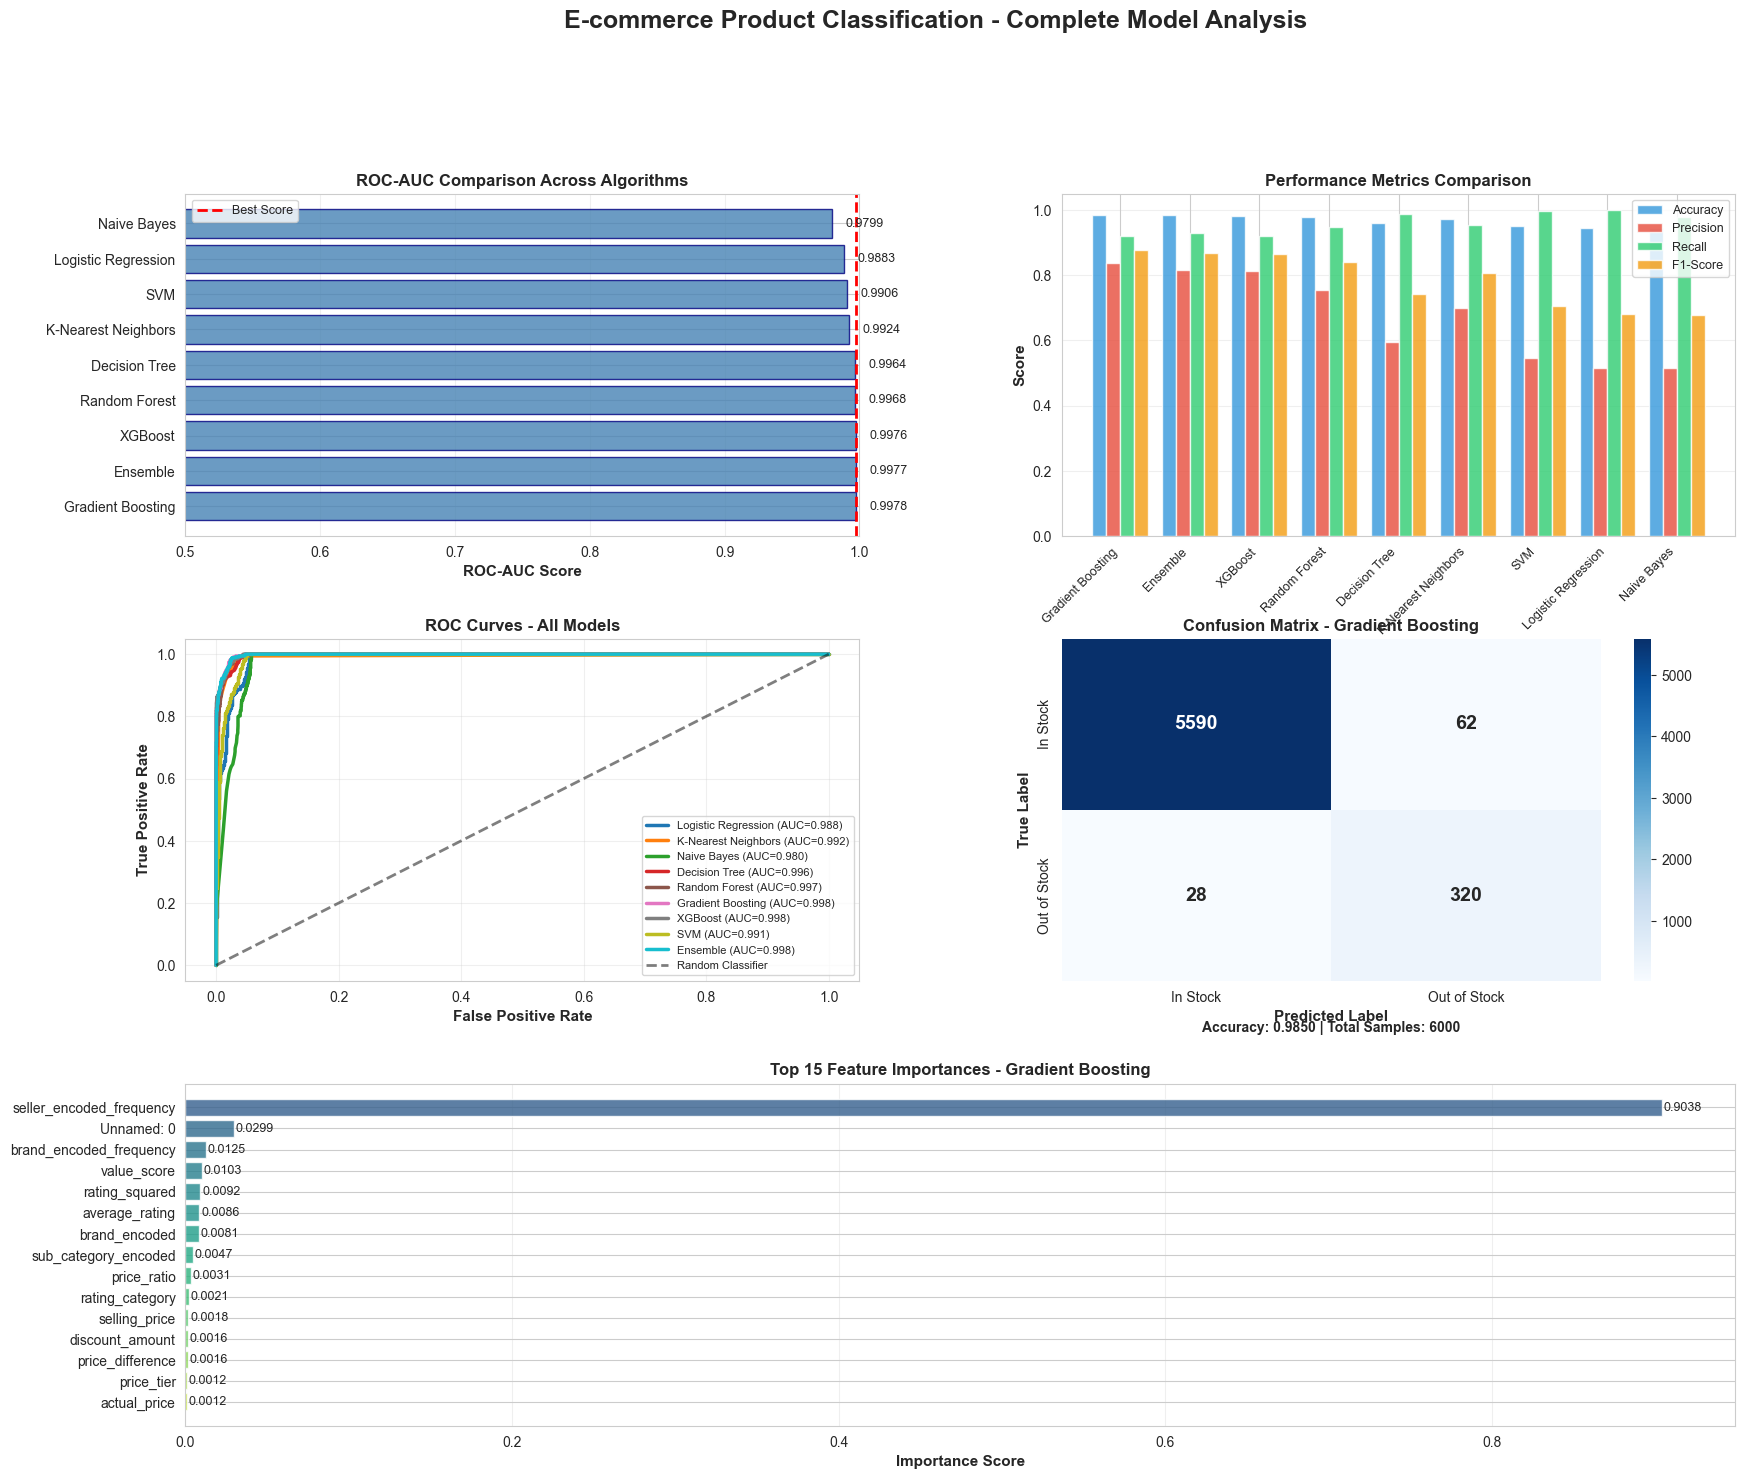

In [43]:
# Check if best model has feature importances
has_feature_importance = hasattr(trained_models[best_model_name]['model'], 'feature_importances_')

# Determine grid layout
if has_feature_importance:
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, :])
else:
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

fig.suptitle('E-commerce Product Classification - Complete Model Analysis', fontsize=18, fontweight='bold', y=0.995)

# 1. ROC-AUC Comparison
ax1.barh(results_df['Algorithm'], results_df['ROC-AUC'], color='steelblue', edgecolor='navy', alpha=0.8)
ax1.axvline(x=results_df['ROC-AUC'].max(), color='red', linestyle='--', linewidth=2, label='Best Score')
ax1.set_xlabel('ROC-AUC Score', fontweight='bold', fontsize=11)
ax1.set_title('ROC-AUC Comparison Across Algorithms', fontweight='bold', fontsize=12)
ax1.set_xlim([0.5, 1.0])
ax1.legend(fontsize=9)
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['ROC-AUC']):
    ax1.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

# 2. Multiple Metrics Comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(results_df))
width = 0.2
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for i, metric in enumerate(metrics_to_plot):
    ax2.bar(x_pos + i*width, results_df[metric], width, label=metric, alpha=0.8, color=colors[i])

ax2.set_xlabel('Algorithms', fontweight='bold', fontsize=11)
ax2.set_ylabel('Score', fontweight='bold', fontsize=11)
ax2.set_title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
ax2.set_xticks(x_pos + width * 1.5)
ax2.set_xticklabels(results_df['Algorithm'], rotation=45, ha='right', fontsize=9)
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0, 1.05])

# 3. ROC Curves
colors_roc = plt.cm.tab10(np.linspace(0, 1, len(trained_models)))
for idx, (name, result) in enumerate(trained_models.items()):
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    auc = roc_auc_score(y_test, result['y_pred_proba'])
    ax3.plot(fpr, tpr, linewidth=2.5, label=f'{name} (AUC={auc:.3f})', color=colors_roc[idx])

ax3.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)
ax3.set_xlabel('False Positive Rate', fontweight='bold', fontsize=11)
ax3.set_ylabel('True Positive Rate', fontweight='bold', fontsize=11)
ax3.set_title('ROC Curves - All Models', fontweight='bold', fontsize=12)
ax3.legend(loc='lower right', fontsize=8)
ax3.grid(alpha=0.3)

# 4. Confusion Matrix for Best Model
cm = confusion_matrix(y_test, best_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax4,
            xticklabels=['In Stock', 'Out of Stock'], 
            yticklabels=['In Stock', 'Out of Stock'],
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
ax4.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold', fontsize=12)
ax4.set_ylabel('True Label', fontweight='bold', fontsize=11)
ax4.set_xlabel('Predicted Label', fontweight='bold', fontsize=11)

# Add accuracy text to confusion matrix
accuracy = accuracy_score(y_test, best_y_pred)
ax4.text(0.5, -0.15, f'Accuracy: {accuracy:.4f} | Total Samples: {len(y_test)}', 
         ha='center', transform=ax4.transAxes, fontsize=10, fontweight='bold')

# 5. Feature Importance (if available)
if has_feature_importance:
    print("\n" + "-"*70)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("-"*70)
    
    # Use X_train columns (after any preprocessing/dropping)
    feature_names = X_train.columns.tolist()
    feature_importances = trained_models[best_model_name]['model'].feature_importances_
    
    # Verify lengths match
    if len(feature_names) != len(feature_importances):
        print(f"Warning: Feature count mismatch!")
        print(f"  Feature names: {len(feature_names)}")
        print(f"  Importances: {len(feature_importances)}")
        min_len = min(len(feature_names), len(feature_importances))
        feature_names = feature_names[:min_len]
        feature_importances = feature_importances[:min_len]
    
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    # Plot in the same figure
    top_features = feature_importance.head(15)
    colors_feat = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
    bars = ax5.barh(range(len(top_features)), top_features['Importance'], color=colors_feat, alpha=0.8)
    ax5.set_yticks(range(len(top_features)))
    ax5.set_yticklabels(top_features['Feature'], fontsize=10)
    ax5.set_xlabel('Importance Score', fontweight='bold', fontsize=11)
    ax5.set_title(f'Top 15 Feature Importances - {best_model_name}', fontweight='bold', fontsize=12)
    ax5.grid(axis='x', alpha=0.3)
    ax5.invert_yaxis()
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, top_features['Importance'])):
        ax5.text(val + 0.001, i, f'{val:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## STEP 7: ANALYSIS CONCLUSION

In [44]:
print("\n1. MODEL RANKING:")
for idx, row in results_df.iterrows():
    rank = results_df.index.get_loc(idx) + 1
    print(f"   #{rank}. {row['Algorithm']}: ROC-AUC={row['ROC-AUC']:.4f}, "
          f"Accuracy={row['Accuracy']:.4f}, F1={row['F1-Score']:.4f}")


1. MODEL RANKING:
   #1. Gradient Boosting: ROC-AUC=0.9978, Accuracy=0.9850, F1=0.8767
   #2. Ensemble: ROC-AUC=0.9977, Accuracy=0.9837, F1=0.8683
   #3. XGBoost: ROC-AUC=0.9976, Accuracy=0.9832, F1=0.8637
   #4. Random Forest: ROC-AUC=0.9968, Accuracy=0.9790, F1=0.8397
   #5. Decision Tree: ROC-AUC=0.9964, Accuracy=0.9602, F1=0.7422
   #6. K-Nearest Neighbors: ROC-AUC=0.9924, Accuracy=0.9737, F1=0.8078
   #7. SVM: ROC-AUC=0.9906, Accuracy=0.9520, F1=0.7067
   #8. Logistic Regression: ROC-AUC=0.9883, Accuracy=0.9457, F1=0.6810
   #9. Naive Bayes: ROC-AUC=0.9799, Accuracy=0.9457, F1=0.6766


In [45]:
print("\n2. KEY FINDINGS:")
print(f"   • Best Algorithm: {best_model_name}")
print(f"   • Best ROC-AUC Score: {best_model_auc:.4f}")
print(f"   • Best Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"   • Best F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"   • Performance over baseline: {(best_model_auc - 0.5)*100:.2f}% improvement")


2. KEY FINDINGS:
   • Best Algorithm: Gradient Boosting
   • Best ROC-AUC Score: 0.9978
   • Best Accuracy: 0.9850
   • Best F1-Score: 0.8767
   • Performance over baseline: 49.78% improvement


In [46]:
# Statistical comparison
top3 = results_df.head(3)
print(f"\n3. TOP 3 PERFORMERS:")
for idx, row in top3.iterrows():
    rank = results_df.index.get_loc(idx) + 1
    print(f"   #{rank}. {row['Algorithm']}: ROC-AUC={row['ROC-AUC']:.4f}, F1={row['F1-Score']:.4f}")


3. TOP 3 PERFORMERS:
   #1. Gradient Boosting: ROC-AUC=0.9978, F1=0.8767
   #2. Ensemble: ROC-AUC=0.9977, F1=0.8683
   #3. XGBoost: ROC-AUC=0.9976, F1=0.8637


In [47]:
print("\n4. AUGMENTATION IMPACT:")
print(f"   • Original training samples: {len(y_train)}")
print(f"   • After SMOTE augmentation: {len(y_train_final)}")
print(f"   • Sample increase: {((len(y_train_final)/len(y_train))-1)*100:.1f}%")
print(f"   • Class balance achieved: {pd.Series(y_train_final).value_counts().min() / pd.Series(y_train_final).value_counts().max():.2%}")


4. AUGMENTATION IMPACT:
   • Original training samples: 24000
   • After SMOTE augmentation: 45212
   • Sample increase: 88.4%
   • Class balance achieved: 100.00%


In [48]:
print("\n5. MODEL PERFORMANCE ASSESSMENT:")
if best_model_auc >= 0.90:
    print("   EXCELLENT - Model shows outstanding predictive power")
    print("   Ready for production deployment")
elif best_model_auc >= 0.80:
    print("   GOOD - Model performs well on test data")
    print("   Consider hyperparameter tuning for improvement")
elif best_model_auc >= 0.70:
    print("   MODERATE - Acceptable performance")
    print("   Additional feature engineering recommended")
else:
    print("   NEEDS IMPROVEMENT - Model requires optimization")
    print("   Review feature selection and data quality")


5. MODEL PERFORMANCE ASSESSMENT:
   EXCELLENT - Model shows outstanding predictive power
   Ready for production deployment


In [49]:
print(f"\n6. MODEL STABILITY:")
best_cv_std = results_df.iloc[0]['CV AUC Std']
if best_cv_std < 0.02:
    print(f"   HIGHLY STABLE (CV Std: {best_cv_std:.4f})")
    print("   Consistent performance across folds")
elif best_cv_std < 0.05:
    print(f"   STABLE (CV Std: {best_cv_std:.4f})")
    print("   Reliable generalization expected")
else:
    print(f"   MODERATE STABILITY (CV Std: {best_cv_std:.4f})")
    print("   Consider more robust validation strategy")


6. MODEL STABILITY:
   HIGHLY STABLE (CV Std: 0.0001)
   Consistent performance across folds


In [50]:
print("\n7. BUSINESS RECOMMENDATIONS:")
print("   • Use model to predict inventory stockouts")
print("   • Focus on high-impact features for inventory management")
print("   • Monitor model performance with new data periodically")
print("   • Consider A/B testing before full deployment")


7. BUSINESS RECOMMENDATIONS:
   • Use model to predict inventory stockouts
   • Focus on high-impact features for inventory management
   • Monitor model performance with new data periodically
   • Consider A/B testing before full deployment
